# Model - 1 - CNN Model (Best Model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)
train_l = train_labels.to_numpy()
# Scale the validation data
val_data = scaler.transform(val_data1)
val_l = val_labels.to_numpy()
# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 7

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

train_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
val_scores = []
best_model = None
best_auc_roc = 0.0
for train_index, val_index in kf.split(train_data):
    # Split the data into training and validation sets for the current fold
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_l[train_index], train_l[val_index]

    # Train the model on the current fold
    history = model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    # Evaluate the model on the training and validation sets of the current fold
    train_predictions = model.predict(train_fold_data)
    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions)

    # Calculate accuracy scores for training and validation sets
    train_acc = model.evaluate(train_fold_data, train_fold_labels, verbose=0)[1]
    val_acc = model.evaluate(val_fold_data, val_fold_labels, verbose=0)[1]

    train_scores.append(train_acc)
    val_scores.append(val_acc)
    
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)
    
    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)


# Compute the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)
avg_val_acc=np.mean(val_scores)
avg_train_acc=np.mean(train_scores)
print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)
print('average val accuracy',avg_val_acc)
print('average train accuracy',avg_train_acc)
# Calculate bias and variance

# Plot bias and variance
# plt.bar(['Bias', 'Variance'], [bias, variance])
# plt.xlabel('Error Type')
# plt.ylabel('Error Value')
# plt.title('Bias-Variance Tradeoff')
# plt.show()


Epoch 1/50
61/61 [==============================] - 2s 12ms/step - loss: 0.5883 - accuracy: 0.7357 - val_loss: 0.5321 - val_accuracy: 0.7377
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7604 - val_loss: 0.5230 - val_accuracy: 0.7593
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7723 - val_loss: 0.5163 - val_accuracy: 0.7685
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7754 - val_loss: 0.5185 - val_accuracy: 0.7654
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7785 - val_loss: 0.5106 - val_accuracy: 0.7562
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7846 - val_loss: 0.5085 - val_accuracy: 0.7654
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7841 - val_loss: 0.5113 - val_accuracy: 0.7531
Epoch 8/50
61/61 [=

# Model - 2 - ANN Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)
train_l = train_labels.to_numpy()
# Scale the validation data
val_data = scaler.transform(val_data1)
val_l = val_labels.to_numpy()
# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(8,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 7

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

train_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
val_scores = []
best_model = None
best_auc_roc = 0.0
for train_index, val_index in kf.split(train_data):
    # Split the data into training and validation sets for the current fold
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_l[train_index], train_l[val_index]

    # Train the model on the current fold
    history = model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    # Evaluate the model on the training and validation sets of the current fold
    train_predictions = model.predict(train_fold_data)
    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions)

    # Calculate accuracy scores for training and validation sets
    train_acc = model.evaluate(train_fold_data, train_fold_labels, verbose=0)[1]
    val_acc = model.evaluate(val_fold_data, val_fold_labels, verbose=0)[1]

    train_scores.append(train_acc)
    val_scores.append(val_acc)
    
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)
    
    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)


# Compute the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)
avg_val_acc=np.mean(val_scores)
avg_train_acc=np.mean(train_scores)
print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)
print('average val accuracy',avg_val_acc)
print('average train accuracy',avg_train_acc)
# Calculate bias and variance

# Plot bias and variance
# plt.bar(['Bias', 'Variance'], [bias, variance])
# plt.xlabel('Error Type')
# plt.ylabel('Error Value')
# plt.title('Bias-Variance Tradeoff')
# plt.show()


Epoch 1/50
61/61 [==============================] - 2s 8ms/step - loss: 0.6685 - accuracy: 0.5605 - val_loss: 0.5878 - val_accuracy: 0.7438
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7481 - val_loss: 0.5747 - val_accuracy: 0.7438
Epoch 3/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5574 - accuracy: 0.7640 - val_loss: 0.5580 - val_accuracy: 0.7562
Epoch 4/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5417 - accuracy: 0.7800 - val_loss: 0.5503 - val_accuracy: 0.7562
Epoch 5/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5302 - accuracy: 0.7872 - val_loss: 0.5470 - val_accuracy: 0.7469
Epoch 6/50
61/61 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7913 - val_loss: 0.5408 - val_accuracy: 0.7562
Epoch 7/50
61/61 [==============================] - 0s 4ms/step - loss: 0.5112 - accuracy: 0.7960 - val_loss: 0.5408 - val_accuracy: 0.7531
Epoch 8/50
61/61 [==

# Model - 3 ANN Model (2)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# Load and preprocess your clinical data
df = pd.read_csv('train.csv')
train_data = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]].values
train_labels = df.iloc[:, [0]].values

dftest = pd.read_csv('test.csv')
val_data = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]].values
val_labels = dftest.iloc[:, [0]].values

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data)

# Scale the training and validation data
train_data = scaler.transform(train_data)
val_data = scaler.transform(val_data)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 7

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

train_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []
val_scores = []

for train_index, val_index in kf.split(train_data):
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_labels[train_index], train_labels[val_index]

    history = model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions)

    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)
    accuracy = accuracy_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)
    val_scores.append(accuracy)

avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)
avg_val_acc = np.mean(val_scores)
print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)
print('Average Validation Accuracy:', avg_val_acc)


Epoch 1/50
61/61 [==============================] - 2s 7ms/step - loss: 0.5660 - accuracy: 0.7496 - val_loss: 0.5014 - val_accuracy: 0.7901
Epoch 2/50
61/61 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7666 - val_loss: 0.4937 - val_accuracy: 0.7747
Epoch 3/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4995 - accuracy: 0.7733 - val_loss: 0.4895 - val_accuracy: 0.7747
Epoch 4/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4949 - accuracy: 0.7769 - val_loss: 0.4888 - val_accuracy: 0.7778
Epoch 5/50
61/61 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7795 - val_loss: 0.4887 - val_accuracy: 0.7778
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7790 - val_loss: 0.4876 - val_accuracy: 0.7840
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7810 - val_loss: 0.4850 - val_accuracy: 0.7778
Epoch 8/50
61/61 [==

# Model - 4 - CNN Model (2)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)
train_l = train_labels.to_numpy()
# Scale the validation data
val_data = scaler.transform(val_data1)
val_l = val_labels.to_numpy()
# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

for train_index, val_index in kf.split(train_data):
    # Split the data into training and validation sets for the current fold
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_l[train_index], train_l[val_index]

    # Train the model on the current fold
    model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    # Evaluate the model on the validation set of the current fold
    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions)  # Convert probabilities to binary predictions

    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Compute the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)

print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)


Epoch 1/50
57/57 [==============================] - 1s 5ms/step - loss: 0.5525 - accuracy: 0.7450 - val_loss: 0.5141 - val_accuracy: 0.7704
Epoch 2/50
57/57 [==============================] - 0s 7ms/step - loss: 0.5110 - accuracy: 0.7561 - val_loss: 0.5103 - val_accuracy: 0.7682
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.5041 - accuracy: 0.7610 - val_loss: 0.5079 - val_accuracy: 0.7726
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7671 - val_loss: 0.5036 - val_accuracy: 0.7726
Epoch 5/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7660 - val_loss: 0.5123 - val_accuracy: 0.7660
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7621 - val_loss: 0.4988 - val_accuracy: 0.7704
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7743 - val_loss: 0.5059 - val_accuracy: 0.7748
Epoch 8/50
57/57 [==

# Model - 5 CNN Model (3)

Epoch 1/50
57/57 [==============================] - 2s 5ms/step - loss: 0.5903 - accuracy: 0.7511 - val_loss: 0.5533 - val_accuracy: 0.7417
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7627 - val_loss: 0.5515 - val_accuracy: 0.7174
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7726 - val_loss: 0.5358 - val_accuracy: 0.7373
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7781 - val_loss: 0.5335 - val_accuracy: 0.7638
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4935 - accuracy: 0.7781 - val_loss: 0.5261 - val_accuracy: 0.7506
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4819 - accuracy: 0.7908 - val_loss: 0.5273 - val_accuracy: 0.7395
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7881 - val_loss: 0.5322 - val_accuracy: 0.7550
Epoch 8/50
57/57 [==

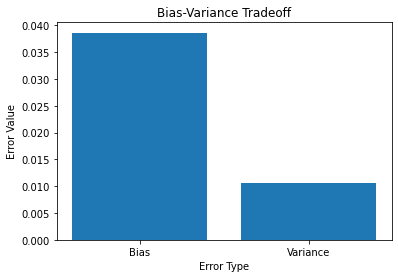

Average Precision: 0.7209617922332168
Average Recall: 0.6394349581777782
Average F1-score: 0.6696088888561443
Average AUC-ROC: 0.7767290982322994
average val accuracy 0.8406181097030639
average train accuracy 0.9613686680793763


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('data.csv')

# Preprocess the data (e.g., handle missing values, normalize/scale features)

# Split the dataset into training and validation sets
df = pd.read_csv('train.csv')
train_data1 = df.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
train_labels = df.iloc[:, [0]]
dftest = pd.read_csv('test.csv')
val_data1 = dftest.iloc[:, [7, 8, 21, 22, 24, 25, 27, 29]]
val_labels = dftest.iloc[:, [0]]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_data1)

# Scale the training data
train_data = scaler.transform(train_data1)
train_l = train_labels.to_numpy()
# Scale the validation data
val_data = scaler.transform(val_data1)
val_l = val_labels.to_numpy()
# Reshape the data for CNN input
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
val_data = val_data.reshape(val_data.shape[0], val_data.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(train_data.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

train_scores = []
val_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

for train_index, val_index in kf.split(train_data):
    # Split the data into training and validation sets for the current fold
    train_fold_data, val_fold_data = train_data[train_index], train_data[val_index]
    train_fold_labels, val_fold_labels = train_l[train_index], train_l[val_index]

    # Train the model on the current fold
    history = model.fit(train_fold_data, train_fold_labels, epochs=50, batch_size=32, validation_data=(val_fold_data, val_fold_labels))

    # Evaluate the model on the training and validation sets of the current fold
    train_predictions = model.predict(train_fold_data)
    val_predictions = model.predict(val_fold_data)

    # Calculate accuracy scores for training and validation sets
    train_acc = model.evaluate(train_fold_data, train_fold_labels, verbose=0)[1]
    val_acc = model.evaluate(val_fold_data, val_fold_labels, verbose=0)[1]

    train_scores.append(train_acc)
    val_scores.append(val_acc)
    val_predictions = model.predict(val_fold_data)
    val_predictions = np.round(val_predictions) 
    precision = precision_score(val_fold_labels, val_predictions)
    recall = recall_score(val_fold_labels, val_predictions)
    f1 = f1_score(val_fold_labels, val_predictions)
    auc_roc = roc_auc_score(val_fold_labels, val_predictions)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_roc_scores.append(auc_roc)

# Calculate bias and variance
bias = 1 - np.mean(train_scores)
variance = np.var(val_scores, ddof=1)
# Plot bias and variance
plt.bar(['Bias', 'Variance'], [bias, variance])
plt.xlabel('Error Type')
plt.ylabel('Error Value')
plt.title('Bias-Variance Tradeoff')
plt.show()
# Compute the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc_roc = np.mean(auc_roc_scores)
avg_val_acc=np.mean(val_scores)
avg_train_acc=np.mean(train_scores)
print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1-score:', avg_f1)
print('Average AUC-ROC:', avg_auc_roc)
print('average val accuracy',avg_val_acc)
print('average train accuracy',avg_train_acc)

31/31 [==============================] - 0s 1ms/step


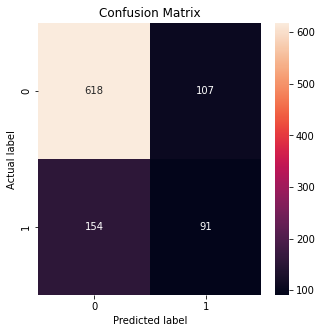

In [6]:
#  print confusion matrix of the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions on the test set
test_predictions = model.predict(val_data)
val_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions
#val_predictions = val_predictions.astype(int)
# Get the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

71/71 [==============================] - 0s 3ms/step


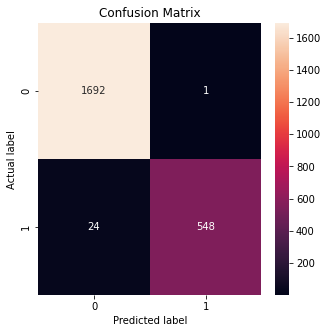

In [7]:
#  print confusion matrix of the train set
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions on the train set
test_predictions = model.predict(train_data)
val_predictions = np.round(test_predictions)  # Convert probabilities to binary predictions
val_predictions = val_predictions.astype(int)
# Get the confusion matrix
cm = confusion_matrix(train_l, val_predictions)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()